In [161]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def build_autoencoder(image,code_size):
    img_shape = image.shape
    
    encoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(img_shape),
        # Convolutional layer with 64 filters of size 3x3 and ReLU activation
        tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu',padding='same'),
        # Max pooling layer with pool size of 2x2 and stride of 2
        tf.keras.layers.MaxPool2D(pool_size=2,padding='same'),

        # Convolutional layer with 128 filters of size 3x3 and ReLU activation
        tf.keras.layers.Conv2D(8, kernel_size=3, activation='relu',padding='same'),
        # Max pooling layer with pool size of 2x2 and stride of 2
        tf.keras.layers.MaxPool2D(pool_size=2,padding='same'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(code_size)
    ])
    
    decoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(code_size,),
        tf.keras.layers.Dense(np.prod(img_shape)),
        tf.keras.layers.Reshape(img_shape)
    ])
    return encoder,decoder


def image2grayscale(image):
    R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
    imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B

    imgGray = imgGray.astype('float32') / 255.
    imgGray = imgGray.reshape((len(imgGray), np.prod(imgGray.shape[1:])))
    return imgGray

def show_image(x):
    plt.imshow(np.clip(x, 0, 255))


def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()


def train_autoencoder(image,code_size):
    encoder, decoder = build_autoencoder(image, code_size)

    inp = tf.keras.layers.Input(image.shape)
    code = encoder(inp)
    reconstruction = decoder(code)

    autoencoder = tf.keras.models.Model(inp,reconstruction)
    autoencoder.compile(optimizer='adamax', loss='mse')

    print(autoencoder.summary())
    
    history = autoencoder.fit(image[np.newaxis, ...], image[np.newaxis, ...], epochs=20)
    
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    return encoder,decoder
    



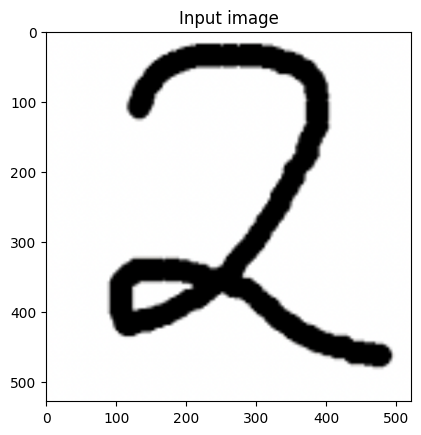

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       [(None, 528, 522, 4)]     0         
                                                                 
 sequential_20 (Sequential)  (None, 32)                4433768   
                                                                 
 sequential_21 (Sequential)  (None, 528, 522, 4)       36381312  
                                                                 
Total params: 40,815,080
Trainable params: 40,815,080
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1/1 [==============================] - 1s 551ms/step - loss: 0.8840
Epoch 2/20
1/1 [==============================] - 0s 170ms/step - loss: 1.0476
Epoch 3/20
1/1 [==============================] - 0s 136ms/step - loss: 0.6217
Epoch 4/20
1/1 [==============================] - 0s 136ms/step - lo

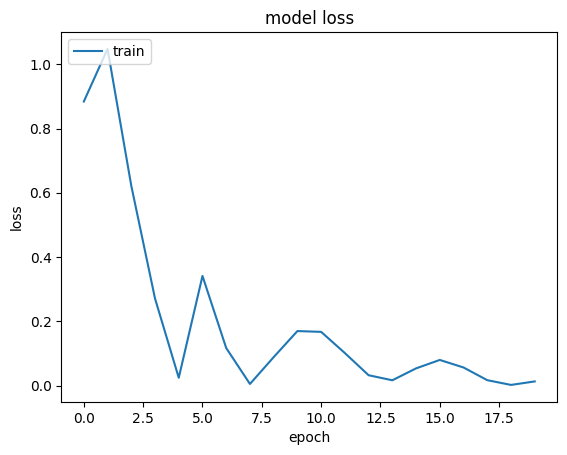

1/1 [==============================] - 0s 24ms/step


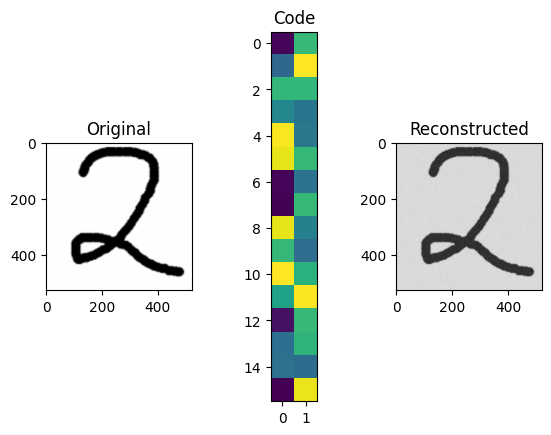

In [157]:
# Load the image
#Black and white image of digit 2
image = plt.imread('digit2.jpg')
plt.imshow(image)
plt.title('Input image')
plt.show()

train_encoder, train_decoder = train_autoencoder(image,32)
visualize(image,train_encoder,train_decoder)


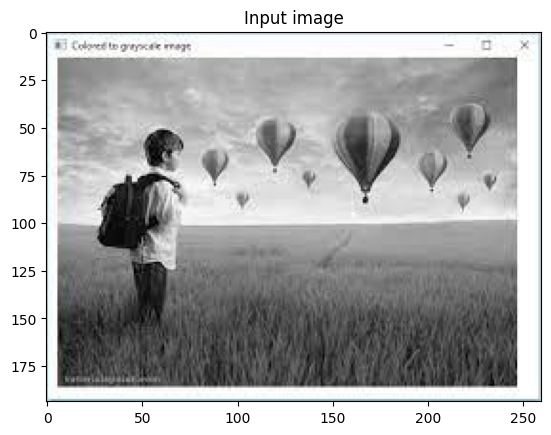

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_55 (InputLayer)       [(None, 194, 260, 3)]     0         
                                                                 
 sequential_26 (Sequential)  (None, 256)               6529544   
                                                                 
 sequential_27 (Sequential)  (None, 194, 260, 3)       38889240  
                                                                 
Total params: 45,418,784
Trainable params: 45,418,784
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1/1 [==============================] - 0s 335ms/step - loss: 28374.8438
Epoch 2/20
1/1 [==============================] - 0s 52ms/step - loss: 40703.1055
Epoch 3/20
1/1 [==============================] - 0s 53ms/step - loss: 14786.0547
Epoch 4/20
1/1 [==============================] - 0s 53ms/

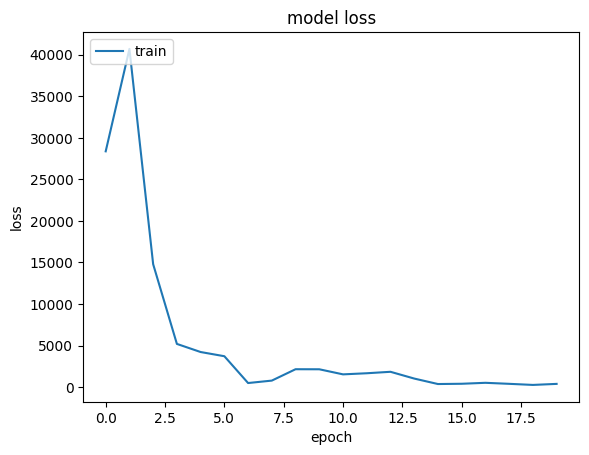

1/1 [==============================] - 0s 23ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


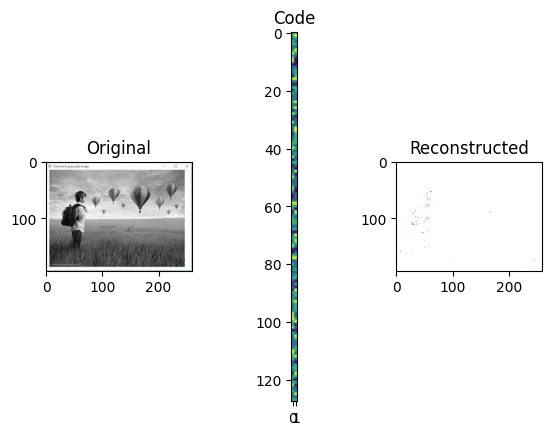

In [162]:
image = plt.imread('confuse.jpg')
plt.imshow(image)
plt.title('Input image')
plt.show()

train_encoder, train_decoder = train_autoencoder(image,256)
visualize(image,train_encoder,train_decoder)


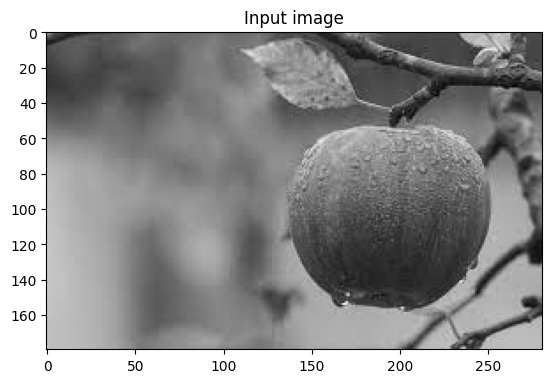

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_58 (InputLayer)       [(None, 180, 281, 3)]     0         
                                                                 
 sequential_28 (Sequential)  (None, 256)               6550024   
                                                                 
 sequential_29 (Sequential)  (None, 180, 281, 3)       38997180  
                                                                 
Total params: 45,547,204
Trainable params: 45,547,204
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1/1 [==============================] - 0s 293ms/step - loss: 16483.7676
Epoch 2/20
1/1 [==============================] - 0s 54ms/step - loss: 17040.1523
Epoch 3/20
1/1 [==============================] - 0s 55ms/step - loss: 15427.6289
Epoch 4/20
1/1 [==============================] - 0s 52ms/

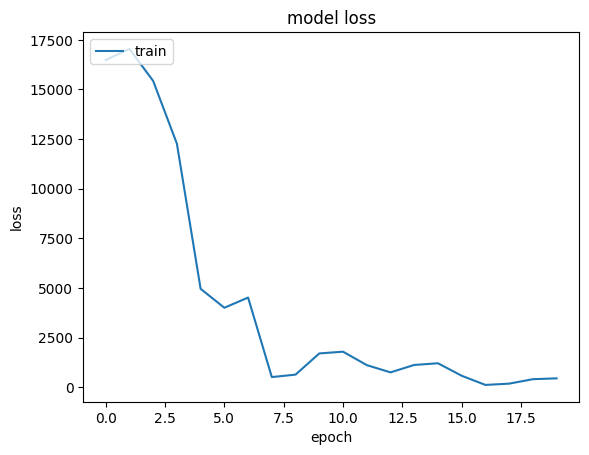

1/1 [==============================] - 0s 21ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


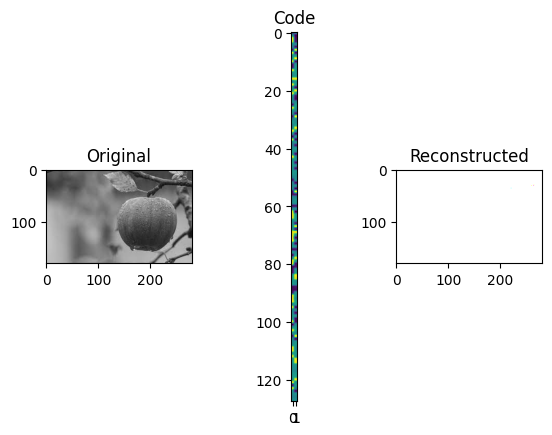

In [163]:
image = plt.imread('image_ml.jpg')
plt.imshow(image)
plt.title('Input image')
plt.show()

train_encoder, train_decoder = train_autoencoder(image,256)
visualize(image,train_encoder,train_decoder)
